# Before we start: disclaimer and references

Part of the content of this notebook, especially the images, are taken from different sources and grounded in the recent NLP scientific literature.
I believe there is no need to reinvent the wheel, so I wrote down a list of all the sources I used.
Furthermore, the students can consider them as **relevant references** for detailed understanding and valuable guides for the assignments.

**Libraries**:
- [1] [HuggingFace libraries](https://huggingface.co/):
They are a set of well-documented open-source libraries developed and maintained by a fast-growing community of developers
that made accessible the use of transformer-based models to the NLP community and practitioners.
In particular, during the class, we will use the following libraries:
    - [1.1] [HF Transformers](https://huggingface.co/transformers/): it contains the implementation of the state-of-the-art transformer-based models.
    - [1.2] [HF Datasets](https://huggingface.co/docs/datasets/): classes to prepare the data for training. It also provides a HUB with many datasets ready-to-use

    - [1.3] [HF Tokenizers](https://huggingface.co/transformers/quicktour.html): include a fast implementation of the most common tokenization methods used for language model training/inference

**Papers**:

- [2] [Attention is all you need (Google)](): where the **transformer** model was initially introduced for the neural machine translation task. The paper is pretty technical but well-written.

- [3] [GPT papers (OpenAI)](https://openai.com/blog/better-language-models/ https://arxiv.org/abs/2005.14165): GPT represents a family of models based on the *decoder* block of the Transformer model trained for a _causal language model_ (predicting words given a previous context) objective and _huge_ amount of data ranging from one to several hundred billion tokens!. The model has been used for both generation and classification tasks. Over the years, they created several versions with increasing model and training size to analyze the properties of language models at scale, reaching the size of **175 billion** parameters for the latest GPT-3 model. One interesting thing, among the others, is the ability to perform few-shot learning (learning new tasks with few examples). In our class, we will use GPT-2 for text generation, a powerful yet trainable 774 million parameters model.

- [4] [BERT paper (Google, again)](https://arxiv.org/abs/1810.04805): The acronym _BERT_ stands for Bidirectional Encoder Representations from Transformers, and it consists of the _encoder_ block of the Transformer model

**Blogs**:

- [5] [Jay Alammar's blog](https://jalammar.github.io/illustrated-transformer/): a series of posts about transformer-based language models from and high-level point of view.
The author did a tremendous job explaining complicated concepts through visual images. I highly recommended it!
  - [The illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)
  - [The Illustrated GPT-2](https://jalammar.github.io/illustrated-gpt2/)

- [6] [OpenAI GPT-3: Everything You Need to Know](https://in.springboard.com/blog/openai-gpt-3/): high-level introduction to GPT for a broad audience. Nevertheless, detailed plots and statistics are reported.

- [7] [10 Things You Need to Know About BERT and the Transformer Architecture That Are Reshaping the AI Landscape](https://neptune.ai/blog/bert-and-the-transformer-architecture-reshaping-the-ai-landscape): general overview that introduces concepts and terminology from the Transformer-based language models.

- [8] [Decoding methods for text generation](https://huggingface.co/blog/how-to-generate)


# Fundamental concepts 

## Language model
A language model is a model that is able to determine the probability of a given sequence of words occurring in a sentence. It computes a probability distribution over the words in a sentence; the higher the probability, the more likely the sentence will be well-formed and representative of the language involved. Statistically, language models learn to model this probability based on a given corpus and language, so how likely the sentence depends on the domain and the quality of the data used. The most common application of language models is the _word prediction_ task, which basically predicts the next word given the context of words in the sentence. If the next word is predicted based on the previous words (right-to-left sequences are included), we talk about _casual language modelling_ (used in GPT-2). In the case the word to predict is a word within the sentence, we refer to the _casual language model_ (used in BERT).

## The Transformer model
It is an architecture introduced in 2017 (from Google) for neural machine translation. Since then, many transformer-based models have been delivered and produced a remarkable impact on (almost) all the NLP tasks. The most salient layer of the Transformer model is the _self-attention_ layer. It is an effective way to produce powerful _contextual embeddings_ that are dense word representations leveraged by the current language models, such the BERT, GPT, and all the subsequent relatives-like models.

The Transformer model was introduced for the machine translation task: given a sentence in a _source language_ (e.g. French) translate in a _target_language_.

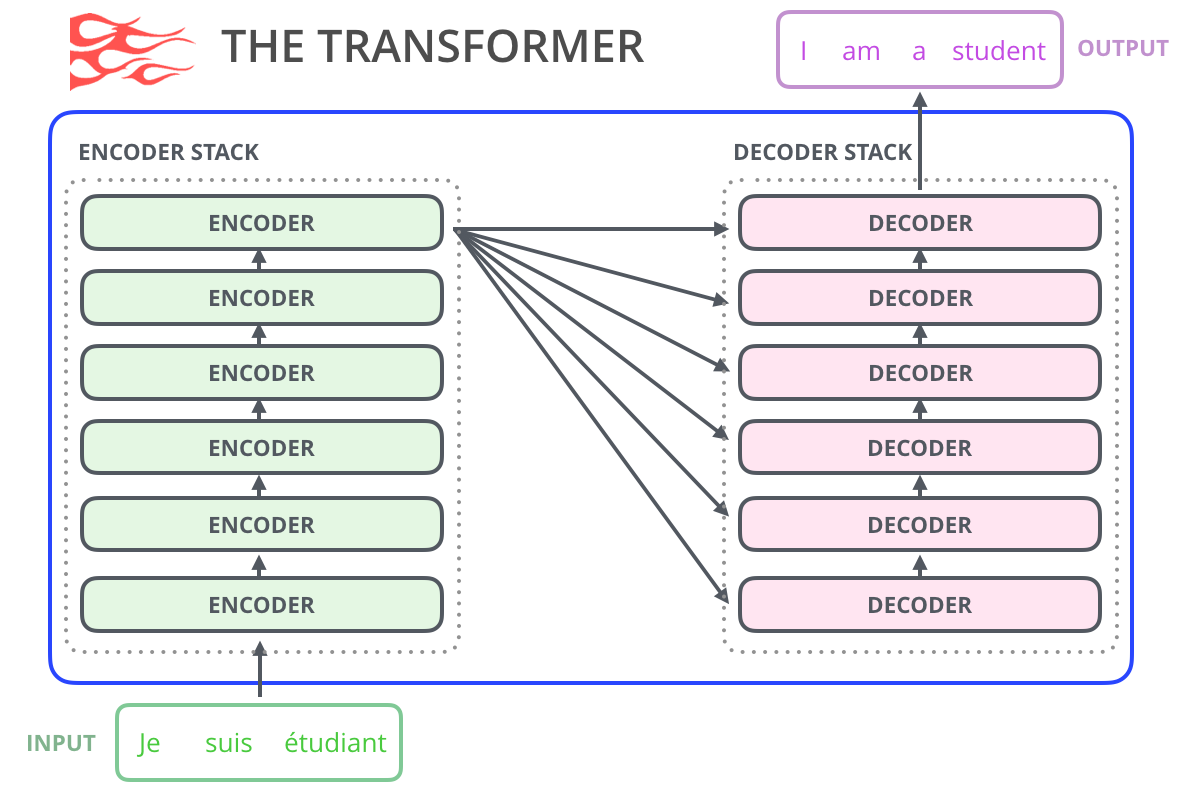

### Encoder and Decoder

By dissecting its architecture, we see two main blocks:

- **Encoder**: 

It receives the source sentence and encodes _contextual embeddings_ for each word (or better, token, as we will see later) in the sentence. The contextual embeddings are dense high-dimensional vectors (768, 1024 dimensions) that produce representations of the words that depends on the other words in the context. So, these representations define a _one-to-many_ mapping between a word and the contexts where the word is. Intuitively, contextual word embeddings model the semantic and syntaxis of the words depending on the context, in contrast to classical word embeddings, where a word has a unique vector _independently_ of its context.

- **Decoder**:

It receives the output of the encoder and generates the translated sentence in the target language _one token at a time_. The decoder is used for  _auto-regressive generation_, an iterative process to generate words from a probability distribution that models the probability of the next word conditioned to the previous words in both the source sentence and the generated words in the translation.


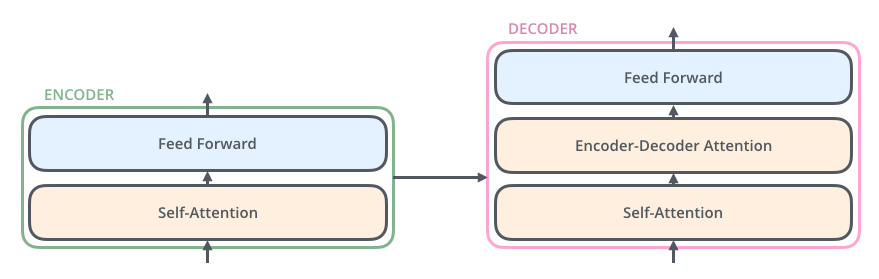

### Self-attention layer

Going deeper into the decoder and the encoder blocks, we find the most characteristic Transformer layer: the _self-attention_ layer. Briefly, taking an input sentence, the self-attention layer computes the contextual word representations by looking at the representation of the other words in the sentence itself (that is why it uses the prefix "self"). 

Citing the blog "https://jalammar.github.io/illustrated-transformer/":

_"As the model processes each word (each position in the input sequence), self-attention allows it to look at other positions in the input sequence for clues that can help lead to a better encoding for this word."_

So, the self-attention layers tell us how critical other words in the same sentences (including the word itself) are and use these _importance scores_ to compute the contextual representation of the word.
The figure below shows is a visual representation of how the attention mechanism works on the sentence _" The animal didn't cross the street because it was too tired"_



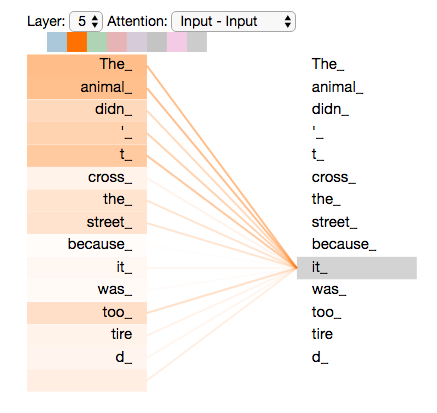

### The embedding layer
The embedding layer is the bottom-most one that converts the words in the input sentence into word vectors. The resulting word vectors are feed to the encoder/decoder blocks where the computational vector flow starts. The size of the resulting embeddings vary from model to model and is a hyperparameter of the model.

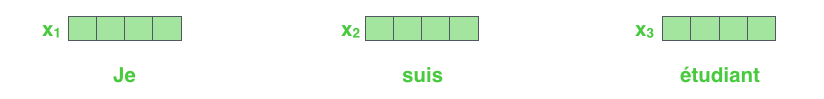

### The decoder's final layers
To predict the words of the translated sentences, the model needs to project from the representation space to the vocabulary space. Therefore, the decoder's representations are first converted into much larger vectors of size equal to the vocabulary of the model, the so-called _logits_. Then, the logits are normalized with the _softmax_ operation to produce a conditioned probability distribution of the next word to predict.


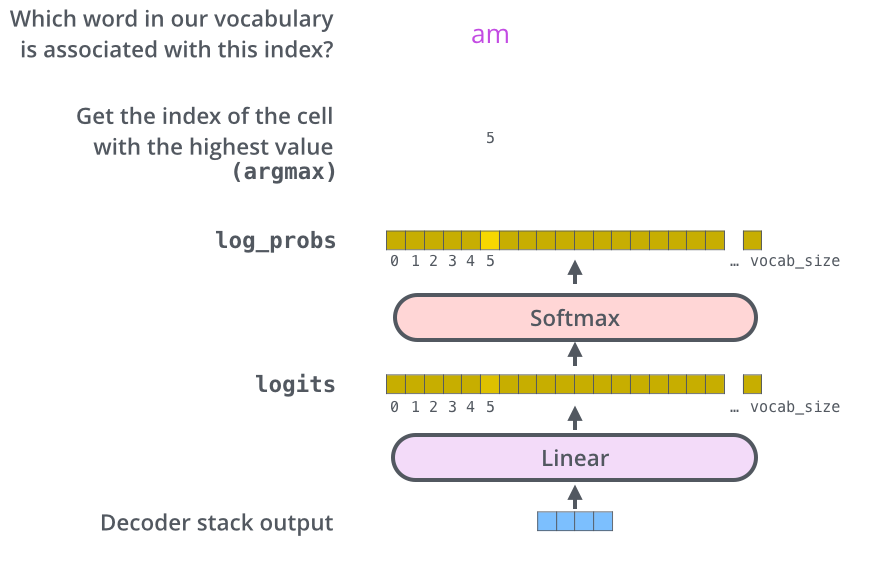

### Putting all together

Below, the full architecture of the Transformer model with (almost) all of the previous components introduced.



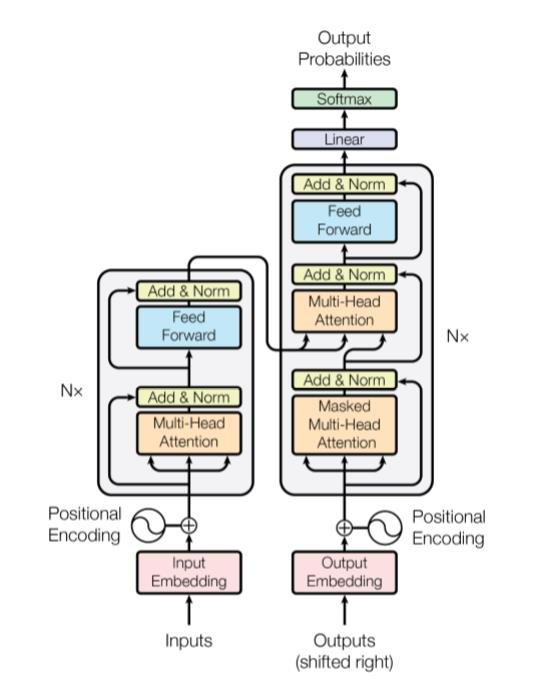

## Model-specific tokenization and special tokens

Each model comes with its tokenizer, which is applied to the training sentences to compute the tokens sequences to process. The goal of a tokenizer is to produce the basic units from which to segment the text. Nowadays, there are many tokenizers, all statistically-based, meaning that they represent machine learning models on their own. In fact, a tokenizer model needs to be trained and then applied to the training corpus before the language model training. The HuggingFace Tokenizers library provides an excellent introduction to the common tokenizers: https://huggingface.co/transformers/tokenizer_summary.html


Special tokens are model-specific symbols used to train language models. 
Since each model employs different pretraining strategies, the special tokens vary across models, and the string representations used are also different. For example, the GPT models use the same symbol _<|endoftext|>_ to mark the beginning and the end of a sentence, while the BERT model uses the _<CLS>_ symbol as the beginning of the sentence, the _<SEP>_ symbol to separate pair of sentences, and the _<MASK>_ symbol to mask tokens in the sentence. The special tokens are added to the sequence of tokens produced by the tokenizer. They are related to the training objectives used. Fortunately, the HF Transformers library includes these tokens in the implementation of the model classes. 



## Pretraining and transfer learning by fine-tuning

**Language model pretraining** refers to the training of usually large-scale language models. Some of the important ingredients of pretraining are:

- Huge training corpus, ranging several billion to hundreds of billion words

- Computational expensive training, with big batch size, increasing number of layers and hidden dimensions

- Most of the time, no hyperparameters search, just training until the loss converge.

- Training objectives that include the prediction of words, _casual language model_ or _masked language model_

**Fine-tuning** means adapting the pretrained model to new tasks, also called _downstream tasks_. For example, the model learns powerful representations during pretraining to perform classification tasks that usually outperform task-specific architectures/models. Therefore, the fine-tuning approach is a form of _transfer learning_, where a model learned for an initial task uses its knowledge to perform new tasks.

# Generative Pretrained Transformer (GPT): language models on steroids and the limits of text generation (and more)

GPT represents a family of models based on the *decoder* block of the Transformer model trained for a _causal language model_ (predicting words given a previous context) objective and _huge_ amount of data ranging from one to several hundred billion tokens!. The model has been used for both generation and classification tasks. Over the years, they created several versions with increasing model and training size to analyze the properties of language models at scale, reaching the size of **175 billion** parameters for the latest GPT-3 model. One interesting thing, among the others, is the ability to perform few-shot learning (learning new tasks with few examples). In our class, we will use GPT-2 for text generation, a powerful yet trainable 774 million parameters model.

It consists, with some variations, of a transformer-decoder block that is used for text generation. Specifically, _conditional generation_ is performed when the model predicts the next words based on a previous context, called _prompt_. In the absence of a prompt, _unconditional generation_ is performed instead.

These models show impressive abilities in a wide range of NLP tasks, with _crazy_ performance on text generation, producing human-like sentences able to fool humans and potentially generate fake news.

The GPT-2 model is now open-source and can be used through the HF Transformers library, while the GPT-3 can only be accessed through the OpenAI API after entering a _waiting list_. In this class, we will adapt the GPT2 model and use it for recipe-based text generation.


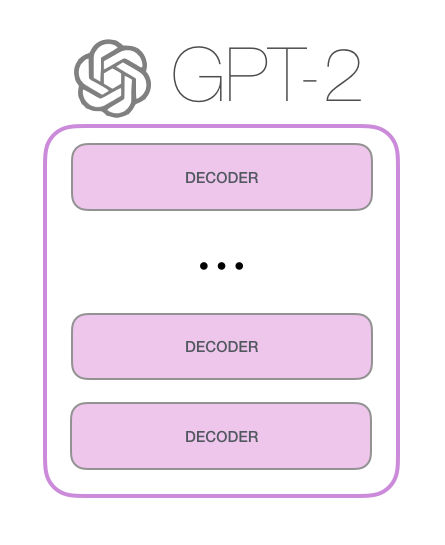

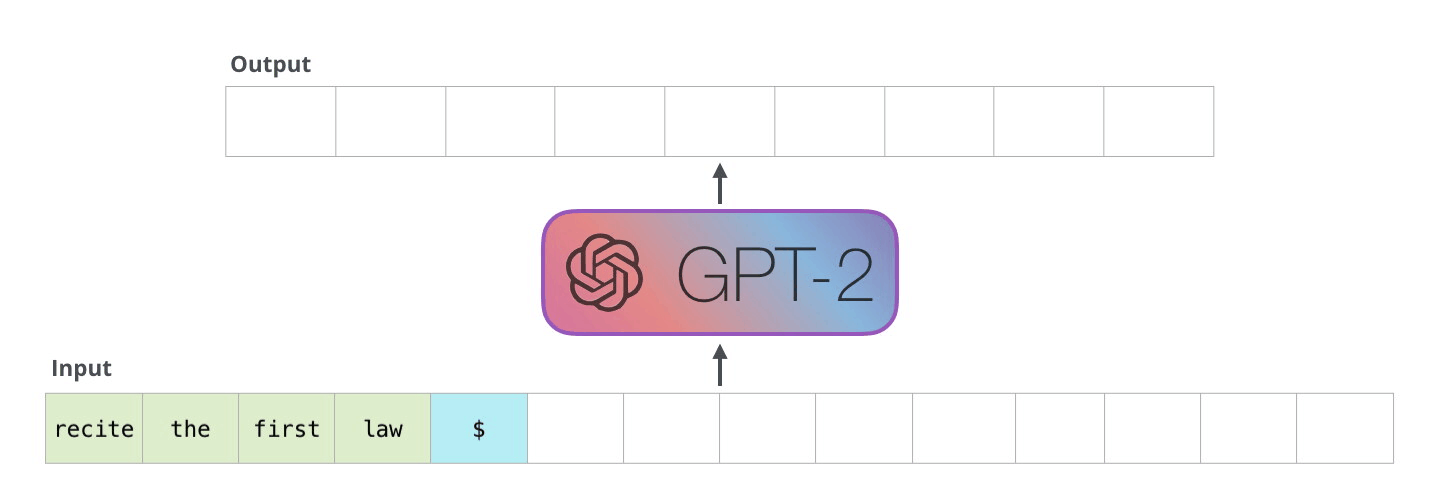

# Coffee break

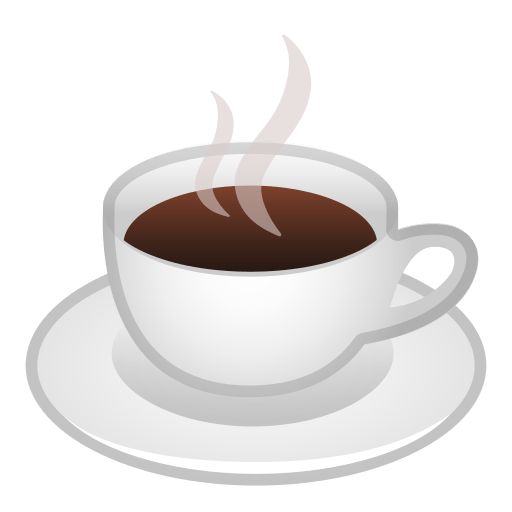

# Coding part: Natural text generation with **GPT-2**
The objective is to use the GPT-2 language model for text generation. We do it by _fine-tuning_ the GPT-2 model on a (casual) language model on a particular domain to generate sentences belonging to that domain through _conditional generation_. Conditional generation is based on a _prompt_ of text the model will use as context to complete the generation. 

As dataset, we will use a set of internation recipes I found here: https://eightportions.com/datasets/Recipes/#fn:1.
The idea is to create a model able to generate recipes given a title and a starting list of ingredients. Let's see what we can get!

### 0) Setup

In [ ]:
# Install libraries
! pip install transformers
! pip install datasets
! pip install tensorboardX
! pip install tensorboard
! pip install sklearn

     |████████████████████████████████| 2.6 MB 8.3 MB/s 
     |████████████████████████████████| 636 kB 59.8 MB/s 
     |████████████████████████████████| 895 kB 55.2 MB/s 
     |████████████████████████████████| 3.3 MB 57.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 264 kB 7.4 MB/s 
     |████████████████████████████████| 243 kB 55.6 MB/s 
     |████████████████████████████████| 118 kB 74.8 MB/s 
     |████████████████████████████████| 76 kB 6.0 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
     |████████████████████████████████| 124 kB 7.2 MB/s 


### 1) Download the dataset, preprocess and load it
This step consist of several operations:

 - First, we load the raw dataset and split into train/valid sets. 
 - Then, we clean the text a bit to get rid of repetitive words and ill-formed sentences. 
 - Finally, we use the `datasets` library to load the raw data splits into the *memory-efficient* and accessible `datasets.Dataset` object that will hold all the data.

We use a dataset of internation

In [ ]:
# download the dataset and extract it
! wget https://storage.googleapis.com/recipe-box/recipes_raw.zip
! unzip -o recipes_raw.zip -d dataset
! rm recipes_raw.zip

--2021-08-08 09:21:41--  https://storage.googleapis.com/recipe-box/recipes_raw.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53355492 (51M) [application/zip]
Saving to: ‘recipes_raw.zip’

recipes_raw.zip     100%[===================>]  50.88M  38.9MB/s    in 1.3s    

2021-08-08 09:21:43 (38.9 MB/s) - ‘recipes_raw.zip’ saved [53355492/53355492]

Archive:  recipes_raw.zip
  inflating: dataset/recipes_raw_nosource_ar.json  
  inflating: dataset/recipes_raw_nosource_epi.json  
  inflating: dataset/recipes_raw_nosource_fn.json  
  inflating: dataset/LICENSE         


In [ ]:
import json
from pathlib import Path

# collect sentences
with open("dataset/recipes_raw_nosource_ar.json") as fn:
  recipes = json.load(fn)

# TODO: wrap the data collection into a function
dataset_path = Path('dataset')
sentences = []
for file in dataset_path.iterdir():
  if file.suffix == '.json':
     with open(file) as fn:
       recipes = json.load(fn)
     for id in recipes.keys():
         try:
             title = recipes[id]['title']
             ingredients = ', '.join([ing for ing in recipes[id]['ingredients']])
             instructions = recipes[id]['instructions']
             sentence = f"{title}, {ingredients}, {instructions}"
             if sentence != '':
                 sentences.append(sentence)
         except KeyError:
             continue

# clean sentences
# TODO: add further cleaning steps
def clean(sentence):
    sentence = sentence.replace('ADVERTISEMENT', '')  # replace repetetive words
    sentence = sentence.replace('\n', ' ')  # replace new line chars
    sentence = sentence.strip()  # strip leading and trailing white-spaces
    return sentence

sentences = list(map(clean, sentences))  # map method.
# sentences = [clean(sentence) for sentence in sentences]  # list comprehension method

In [ ]:
from sklearn.model_selection import train_test_split

# split into train/dev
# TODO: alternatively, we could use the `datasets.Dataset.train_test_split()` method 
SEED = 10  # set seed var for reproducibility
train_sentences, test_sentences = train_test_split(sentences, 
                                                   test_size=0.1, 
                                                   # change the train_size for rapid testing (for example, use 0.1)
                                                   train_size=0.9,  
                                                   random_state=SEED)

# write into files
for split, sents in zip(['train', 'test'], [train_sentences, test_sentences]):
    with open(f"{split}.txt", 'w') as fn:
        fn.write('\n'.join(sents))


In [ ]:
# create the datasets.Dataset object
from datasets import load_dataset

dataset = load_dataset('text', data_files={'train': 'train.txt', 'test': 'test.txt'})

Using custom data configuration default-0f36a676085d696a


0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset text downloaded and prepared to /root/.cache/huggingface/datasets/text/default-0f36a676085d696a/0.0.0/e16f44aa1b321ece1f87b07977cc5d70be93d69b20486d6dacd62e12cf25c9a5. Subsequent calls will reuse this data.


Basically, a `datasets.Dataset` is **table with rows and columns** in which the columns are typed. To better understand what a `datasets.Dataset` object is and how it store the data, try the lines below: 

Below, some attributes and methods to familiarize with this object

- `dataset.cache_files`  # shows where the files are cached
- `len(dataset)`  # number of examples (rows)
- `dataset[0]`  # accessing first example (row) by indexing
- `dataset.shape`  # [number of examples, number of features]
- `dataset.column_names`  # lists features names (columns)
- `dataset.features`  # lists type features
- `dataset.split`  # metadata: shows to which split the data belongs
- `dataset.description`  # metadata: description of the dataset
- for more, check the documentation: https://huggingface.co/docs/datasets/exploring.htm

The library provides also an HUB of dataset for several NLP tasks. Check it: https://huggingface.co/datasets

### 2) Prepare the features.
We create the features used to feed the model by:
 - Tokenizing: convert to list of indexes. We use the `map()` method of `datasets.Dataset` object
 - Group sentences into batches of equal size using the function `group_texts` from the Transformers library: https://github.com/huggingface/transformers/blob/master/examples/pytorch/language-modeling/run_clm.py.
 - Prepare the input feature and the labels for the language model training. In this case, the labels to predict are the _shifted_ list of words, following the definition of language model task (see the Basic concepts section)

In [ ]:
# Instantiate tokenizer
from transformers import AutoTokenizer
pretrained_model = 'gpt2'
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=pretrained_model)

# Define a function to tokenize the dataset and return the text indices. 
# We also add trailing <|endoftext|> special token
def tokenize_sentence(dataset):
    # As we can see, there is no padding since the PAD token is not originally used by GPT-2. 
    # We could perform padding by adding the PAD token to the vocabulary with the method `add_special_tokens()`
    return tokenizer([f"{sentence} {tokenizer.eos_token}" for sentence in dataset['text']])

# apply to dataset object
dataset_features = dataset.map(tokenize_sentence,
                               batched=True,
                               remove_columns=['text'],
                               desc='Tokenizing train and test splits')

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Tokenizing train and test splits:   0%|          | 0/113 [00:00<?, ?ba/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1109 > 1024). Running this sequence through the model will result in indexing errors


Tokenizing train and test splits:   0%|          | 0/13 [00:00<?, ?ba/s]

In [ ]:
# group sentences in batches of equal size (standard GPT-2 approach)
# We use an adaptation of the `group_text` function for that purpose
def group_texts(examples):
    # Concatenate all texts.
    block_size = 512  # set the "blocks" to half of the maximum GPT-2 model length (1024) for memory issues
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    # We drop the small remainder, we could add padding if the model supported it instead of this drop, you can
    # customize this part to your needs.
    if total_length >= block_size:
        total_length = (total_length // block_size) * block_size
    # Split by chunks of max_len.
    result = {
        k: [t[i: i + block_size] for i in range(0, total_length, block_size)]
        for k, t in concatenated_examples.items()
    }

    # # Add labels to the dataset_features
    # # Since the task is language modelling, the labels to predict are actually the input indices "shifted"

    # result["labels"] = result["input_ids"].copy()
    return result

# apply the group function to the dataset

dataset_grouped = dataset_features.map(group_texts,
                                       batched=True,
                                       desc='Group sentences in blocks of equal size (512)')


Group sentences in blocks of equal size (512):   0%|          | 0/113 [00:00<?, ?ba/s]

Group sentences in blocks of equal size (512):   0%|          | 0/13 [00:00<?, ?ba/s]

In [ ]:
# Add "labels" column to the dataset_features. 
# To modify the dataset structure, we use the `dataset.map()` method
def add_labels(dataset):
    # Since the task is language modelling, the labels to predict are actually 
    # the input indices shifted forward by one element (token)
    dataset['labels'] = dataset['input_ids'].copy()
    return dataset

dataset_for_lm = dataset_grouped.map(add_labels,
                                     batched=True,
                                     desc='Add labels to create data for language model training')
 

Add labels to create data for language model training:   0%|          | 0/72 [00:00<?, ?ba/s]

Add labels to create data for language model training:   0%|          | 0/8 [00:00<?, ?ba/s]

### 3) Train the model
#### Usage of the `Trainer` API
It provides a complete **training loop** under the hood, simplifying a lot the training. It also set some useful training and evaluation strategies.

In [ ]:
# Instantiate the model class
from transformers import (
    AutoConfig, 
    AutoModelForCausalLM, 
    Trainer, 
    TrainingArguments,
    default_data_collator,
)
import torch


# TODO: experiment with different model configuration and batch sizes until 
# the models fits into GPU memory (otherwise it generated CUDA-out-of-memory error)
# The model is instantiated from the pretrained GPT-2 model
# Here, I reduced the number of attention head and layers, 
# to significantly reduce the model size and make sure it fits in the GPU memory
config = AutoConfig.from_pretrained(pretrained_model,
                                    n_head=12,  # reduce the size of the model for memory issues
                                    n_layer=12)

pretrained_model = 'gpt2-recipes'
model = AutoModelForCausalLM.from_pretrained(pretrained_model, 
                                             config=config)

# Again, we simulate a batch size of 8 by setting the `gradient_accumulation_steps` parameters
no_cuda = not bool(torch.cuda.is_available())

if no_cuda:
  print(f"Training on CPUs")
else:
  print(f"Training on GPU")

training_args = TrainingArguments(no_cuda=no_cuda,
                                  per_device_train_batch_size=4,
                                  per_device_eval_batch_size=4,
                                  gradient_accumulation_steps=4, # virtually increment the batch_size
                                  evaluation_strategy='epoch',
                                  save_strategy='epoch',
                                  logging_steps=100,
                                  logging_dir='gpt2-recipes/tb',  # where to store the tensorboard
                                  num_train_epochs=2,
                                  output_dir='gpt2-recipes')

# Start the training!
# Initialize our Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_for_lm['train'],
    eval_dataset=dataset_for_lm['test'], # we use the test set as validation set
    tokenizer=tokenizer,
    # Data collator is used to create batches from data. 
    # When a tokenizer is passed the default to DataCollatorWithPadding is used.
    # So we change it since our model do not use PAD tokens
    data_collator=default_data_collator,
)

loading configuration file https://huggingface.co/gpt2/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/fc674cd6907b4c9e933cb42d67662436b89fa9540a1f40d7c919d0109289ad01.7d2e0efa5ca20cef4fb199382111e9d3ad96fd77b849e1d4bed13a66e1336f51
Model config GPT2Config {
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "gradient_checkpointing": false,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "resid_pdrop": 0.1,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50

Training on GPU


In [ ]:
# Use tensorboard to monitor the training
# Load the TensorBoard notebook extension
%reload_ext tensorboard  

 # read data from tensorboard dir
%tensorboard --logdir gpt2-recipes/tb 

In [ ]:
# Finally: let's start the training!
train_results = trainer.train()

Loading model from /content/gpt2-recipes/checkpoint-4448).
***** Running training *****
  Num examples = 71173
  Num Epochs = 2
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 4
  Total optimization steps = 8896
  Continuing training from checkpoint, will skip to saved global_step
  Continuing training from epoch 1
  Continuing training from global step 4448
  Will skip the first 1 epochs then the first 0 batches in the first epoch. If this takes a lot of time, you can add the `--ignore_data_skip` flag to your launch command, but you will resume the training on data already seen by your model.


0it [00:00, ?it/s]

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss


In [ ]:
# Save model and tokenizer
trainer.save_model('gpt2-recipes')

# Save the metrics obtained (loss)
metrics_train = train_results.metrics
trainer.log_metrics('train', metrics_train)
trainer.save_metrics('train', metrics_train)

# save trainer state Saves the Trainer state, since Trainer.save_model 
# saves only the tokenizer with the model
trainer.save_state()

### 4) Evaluate the model
The model is evaluated, in our case, on the test set. We use the loss along with the _perplexity_ as evaluation metrics. Shortly, the _perplexity_ is a measure of how a probability model (our trained model) predict a sample (from the test set). A low perplexity indicates the probability distribution is good at predicting the sample. 

More info here: https://en.wikipedia.org/wiki/Perplexity

In [ ]:
metrics_eval = trainer.evaluate()

In [ ]:
import math

# compute perplexity as the exponential of the loss (cross-entropy)
perplexity = math.exp(metrics_eval['eval_loss'])
metrics_eval['perplexity'] = perplexity

# save evaluation metrics
trainer.log_metrics('eval', metrics_eval)
trainer.save_metrics('eval', metrics_eval)

In [ ]:
# Finally, mount yout Google Drive folder in the runtime to permanently saved the trained model
from google.colab import drive
drive.mount('/content/drive')  # mount the drive folder in the Colab env
! cp -r 'gpt2-recipes-ep-2/' '/content/drive/MyDrive/Colab Notebooks/strive-school-nlp-aug-2021/natural-text-generation'  # copy the model to drive

## Generation
### Introduction
Let's generate some text now.  Text generation involves a different _decoding algorithms_ that rely on trained language models. It can be controlled by several parameters that significantly affects the performances and the generated sequences. There are several _decoding methods_ to generate text from a pretrained language model, such as _greedy search_ versus _beam search_. The HF Transformers library implements various methods as parameters of the `model.generate()` method you can controll. Changing some of them can significantly impact on the performance of the generated text. In general, some decoding algorithms can be complex to understand, that is why we use the most basic methods here.

To understand and explore complex decoding methods, I recommend this blog from the HF community https://huggingface.co/blog/how-to-generate


Let's use our model to generate some recipe! Keep in mind that, depending on how the model has been trained (number of epochs, amount of data, size of the model itself) the results can be far from realistic and often very creative 😃.

In [ ]:
from transformers import AutoConfig, AutoTokenizer, AutoModelForCausalLM
checkpoint = '/content/drive/MyDrive/Colab Notebooks/strive-school-nlp-aug-2021/natural-text-generation/gpt2-half-steps-10-recipes'
config = AutoConfig.from_pretrained(pretrained_model_name_or_path=checkpoint)
model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=checkpoint,
                                             config=config)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=checkpoint)

# 2) CREATE A PROMPT, TOKENIZE IT AND CREATE TENSORS
while True:
    prompt = input('\n\nInsert prompt\n')
    max_length = int(input('\nInsert max generation length\n'))


    # Tokenize the prompt and return tensors needed by the `model.generate()` method
    tokenized_prompt = tokenizer(prompt, return_tensors='pt')  
    
    # 3) RUN CONDITIONAL GENERATION
    print(f"Run conditional generation with prompt: <{prompt}>")
    output_sentence = model.generate(input_ids=tokenized_prompt['input_ids'],
                                     max_length=max_length)

    output_sentence.squeeze_()  # remove batch dimension
    generated_text = tokenizer.decode(output_sentence)
    # TODO: add postprocessing to clean the generated text (e.g, cut the text at stop words such as periods)
    print(f"Generated recipe:\n {generated_text}")



Insert prompt
Risotto with mushrooms

Insert max generation length
10


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Run conditional generation with prompt: <Risotto with mushrooms>
Generated recipe:
 Risotto with mushrooms mushrooms in the same amount


Insert prompt
Risotto with mushrooms

Insert max generation length
30


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Run conditional generation with prompt: <Risotto with mushrooms>
Generated recipe:
 Risotto with mushrooms mushrooms, which may be able easily enough. There is no doubt whatsoever if ever ever existed. The Darkest Beast Beast Beast


Insert prompt
Robert De Niro is an actor that

Insert max generation length
100


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Run conditional generation with prompt: <Robert De Niro is an actor that>
Generated recipe:
 Robert De Niro is an actor that represents an specialised. Thankfully thankfully thankfully, anyway. It's definitely better than any otherworldly adventures involving the wholeheartedly before the second. This happens to me. I'll be able bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod bod


KeyboardInterrupt: ignored

# Assignment 1:

Fine-tune the GPT-2 model with data from different domains. For example, you could use a collection of song lyrics, poetry or even news articles. 

Keep in mind a few things:

- On the recipes datasets with 71k training examples, the model took about 3 hours to end one epoch. So, it's definitively possible to train it on Colab. You could also perform more epochs to improve the model performance.

- Since the data format is just _plain sentences_ you could also scrape from the web whatever content you like. There are a lot of python libraries for scraping out there!

- If you experience _CUDA Out of memory_ errors, try to decrease some of the followings hyperparameters: 
  - batch size
  - number of layers
  - number of heads



# Assignment 2

Experimentally try out different decoding methods and report the one that performs "best". For example, try to discover if some sentences are easy to generate. We will comment on the results during the debrief session.



# Assignment 3 (optional)
**Optional**: _measure_ how good the generated text is, compared to the expected one, using the BLEU score. It basically takes as input a _reference sentence_ and a _generated sentences_ and computes the n-gram overlap between them to define a score of similarity. This library helps you compute the BLEU easily: https://pypi.org/project/bleu/